# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
employee=pd.read_csv("./Employee.csv")
employee["IDNumber"]=employee.index
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary,IDNumber
0,Jose,IT,Bachelor,M,analyst,1,35,0
1,Maria,IT,Master,F,analyst,2,30,1
2,David,HR,Master,M,analyst,2,30,2
3,Sonia,HR,Bachelor,F,analyst,4,35,3
4,Samuel,Sales,Master,M,associate,3,55,4


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# With pivot tables

employee.pivot_table(index=["Department"], values=["Salary"])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Group by and aggregate function

employee.groupby(["Department"]).agg({"Salary": "mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
employee.pivot_table(index=["Department","Title"], values=["Salary"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
employee.pivot_table(index=["Title"], values=[ "Salary","Years"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
employee.pivot_table(index=["Department", "Title"], values=["IDNumber","Salary"], aggfunc={"IDNumber":"count","Salary":"mean"})

IDNumber  Salary
Department Title                      
HR         VP                1    70.0
           analyst           2    32.5
IT         VP                1    70.0
           analyst           2    32.5
           associate         1    60.0
Sales      associate         2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
dfDepTit=employee.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=["median","max","min","std"])
dfDepTit

median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
#employee.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=["median","max","min","std"], fill_value=0)
# I am not sure why the above does not work. I am applying fill_value=0 according to the documentation

dfDepTit.fillna(0)

median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
employee.pivot_table(index=["Department"], values=["Salary","IDNumber"], aggfunc={"Salary":"sum", "IDNumber":"count"})

,IDNumber,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:
employee.pivot_table(index=["Department", "Title"], values=["Years","Salary"], aggfunc={"Salary":"mean", "Years":"sum"})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
def removeMax(x):
    a=x.pivot_table(index=["Department"], values=["Salary"], aggfunc="max")
    indices=[]
    for i in a.index: 
        indices.append((x.loc[((x["Department"]==i)&(x["Salary"]==(a.loc[i,"Salary"])))]).index.tolist())
    flat=[e for l in indices for e in l]
    x=x.drop(x.index[flat])
    return x 

In [37]:
dEmp=removeMax(employee)
print(dEmp)
print(dEmp['Salary'].mean())

    Name Department Education Gender      Title  Years  Salary  IDNumber
0   Jose         IT  Bachelor      M    analyst      1      35         0
1  Maria         IT    Master      F    analyst      2      30         1
2  David         HR    Master      M    analyst      2      30         2
3  Sonia         HR  Bachelor      F    analyst      4      35         3
7  Pedro         IT       Phd      M  associate      7      60         7
38.0


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [14]:
fitbit=pd.read_csv("./Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [15]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [16]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [17]:
#fitbit[["Minutes Very Active", "Steps"]].corr()
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

Text(0, 0.5, 'Steps')

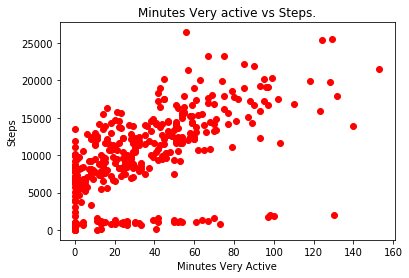

In [18]:
plt.scatter(x=fitbit["Minutes Very Active"], y=fitbit["Steps"], color=['red'])
plt.title("Minutes Very active vs Steps.")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")

#### What can you say about Minute Very Active and Steps? Write a comment below

You can see a strong correlation between the number of minutes very active and the number of steps, you could imagine a positive regression line through the mass of points in the scatter plot.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [19]:
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

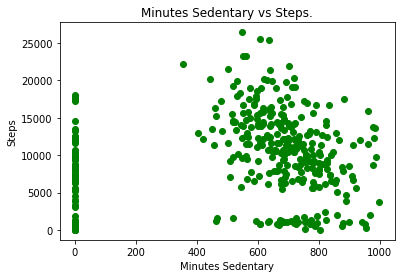

In [20]:
plt.scatter(x=fitbit["Minutes Sedentary"], y=fitbit["Steps"], color=['green'])
plt.title("Minutes Sedentary vs Steps.")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")

We can observe a very weak correlation between the minutes sendentary and the steps. the point cloud in the scatter plot does not clearly draw a regression line and several areas with different densities can be observed. This means that there is no trend followed by the data.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [21]:
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

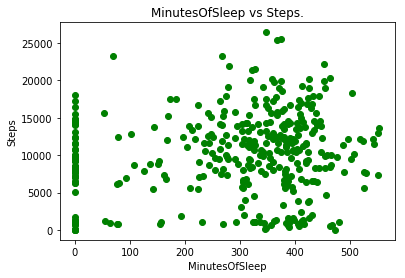

In [22]:
plt.scatter(x=fitbit["MinutesOfSleep"], y=fitbit["Steps"], color=['green'])
plt.title("MinutesOfSleep vs Steps.")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")

Variables maintain a very weak correlation and by observing the scatter plot one could assume that there is no association between the parameters since dots are distributed showing no trend.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [23]:
cor_fit=fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

In [24]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [25]:
cor_fit.sort_values("Steps", ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


Steps is highly correlated just with "Minutes Very Active"

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [26]:
time_grades=pd.read_csv("./Time_Grades.csv")

In [27]:
time_grades#Print time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

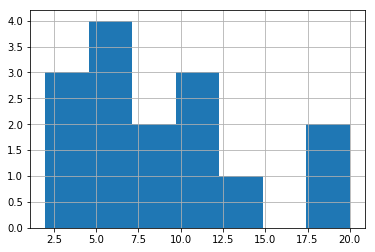

In [28]:
time_grades["Study time"].hist(bins=7)

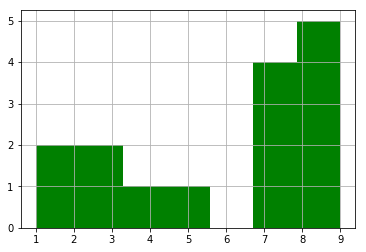

In [29]:
time_grades["Grade"].hist(bins=7, color="green")

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [30]:
time_grades["Study time"].corr(time_grades["Grade"], method="pearson")

0.7980456073578858

In [31]:
time_grades["Study time"].corr(time_grades["Grade"], method="spearman")

0.819658753036942

There is a strong positive correlation between study time and grade, meaning that the more time one studies the better grade s7he will obtain.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Grade')

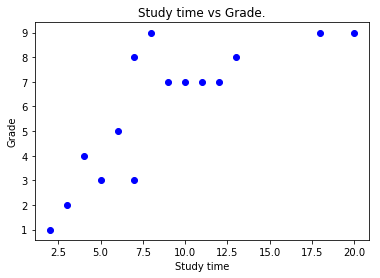

In [32]:
plt.scatter(x=time_grades["Study time"], y=time_grades["Grade"], color=['blue'])
plt.title("Study time vs Grade.")
plt.xlabel("Study time")
plt.ylabel("Grade")

There is a positive no linear correlation whose slope is higher where for lower values of study time and lower for higher values of study time. In other words, the first hours of study have a bigger effect in the grade than the latter.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Pearson is used to study linear correlations between variables while Spearman is used to study non-linear correlations.The first would indicate a direct relationship(if a value increases the other increases o decreases proportionally by a factor), the latter indicates the an indirect relationship(if a value increases,the other tends to increase or decrease, however it doesnt do it proportionally by a factor but by a second grade polinomyal)